1- Libreria y configuraciones

In [1]:
%%time

# Instalación de librerías necesarias:
from gc import collect  # Recolección de basura para liberar memoria
from warnings import filterwarnings  # Manejo de mensajes de advertencia

import re  # Expresiones regulares

import numpy as np  # Álgebra lineal
import pandas as pd  # Procesamiento de datos, lectura de archivos CSV, etc.
from scipy import stats  # Funciones estadísticas

from itertools import cycle, combinations  # Generación de combinaciones y ciclos

import matplotlib.pyplot as plt  # Visualización de datos
from matplotlib.ticker import FuncFormatter  # Formato personalizado para marcas en ejes
from matplotlib.ticker import FormatStrFormatter  # Formateo de marcas con cadenas
from mpl_toolkits.mplot3d import Axes3D  # Módulo para gráficas en 3D
from matplotlib.colors import ListedColormap  # Mapa de colores para gráficos de dispersión
import seaborn as sns  # Visualización estadística de datos
from wordcloud import WordCloud  # Nube de palabras para visualizar datos textuales

from io import StringIO  # Entrada/salida en memoria (usado para redirigir texto)

filterwarnings('ignore')  # Ignorar mensajes de advertencia
from IPython.display import display, HTML, display_html, clear_output  # Mostrar contenido HTML en Jupyter

# Limpia salida previa y recolectar basura
clear_output()
print()
collect()


CPU times: total: 625 ms
Wall time: 1min 12s


20

In [4]:
%pip install scipy
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Establecer el estilo de gráficos a 'fivethirtyeight'
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    RESET = '\033[0m'

# Definir propiedades globales de estilo (por ejemplo, para tablas HTML)
global_style = {
    "background-color": "#ff4d4d",  # Fondo rojo suave
    "color": "#e6e6ff",             # Texto claro
    "border": "1.5px solid black",  # Borde negro
    "font-weight": "bold"           # Texto en negritas
}

# Aplicar estilo visual a gráficos
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (10, 10)})

# Mensaje de confirmación en consola (con color verde)
print(f"{color.GREEN}¡Librerías configuradas exitosamente!{color.END}")


¡Librerías configuradas exitosamente!


Step 2 | Load Dataset

In [28]:
%%time

# Manejo de errores al cargar el conjunto de datos con Pandas read_csv

try:
    # Intentar leer el conjunto de datos
    df = pd.read_csv('salaries.csv')
    print(f"{color.GREEN}Dataset cargado exitosamente.{color.END}")
    
except FileNotFoundError:
    # Manejar el error si el archivo no existe
    print(f"{color.RED}Error: Archivo no encontrado. Verifica la ruta del archivo.{color.END}")

except Exception as e:
    # Manejar cualquier otro tipo de excepción
    print(f"{color.RED}Ocurrió un error al cargar el conjunto de datos: {e}{color.END}")

# Imprimir texto en azul (vacío por ahora, pero mantiene estilo)
print(color.BLUE)
collect()


Dataset cargado exitosamente.

CPU times: total: 31.2 ms
Wall time: 117 ms


16004

Step 3 | Attribute Overview

In [29]:
def display_dataframe_with_custom_header(df, show_head=False):
    # Definir propiedades globales de estilo
    global_style = {
        "background-color": "#2e3440",
        "color": "#FFFF00",
        "border": "1.5px solid black",
        "font-weight": "bold",
        "font-family": "'Courier New', Courier, monospace"  # Usar fuente monoespaciada para vista en tabla
    }

    # Texto de encabezado personalizado con fuente "Poetsen One" y efecto de onda
    header_text = """
    <h2 style='color: #FF5733; font-weight: bold; font-family: "Poetsen One", sans-serif;
                animation: wave 1.5s infinite;'>
        D<span style="color: #FFFF00;">A</span>T<span style="color: #FFFF00;">A</span>FRAME 
        {frame_type} 
    </h2><br>

    <style>
    @keyframes wave {{
        0% {{ transform: rotate(-2deg); }}
        50% {{ transform: rotate(2deg); }}
        100% {{ transform: rotate(-2deg); }}
    }}
    </style>
    """

    # Determinar el tipo de visualización
    frame_type = "HEAD" if show_head else "INFORMATION"
    header_text = header_text.format(frame_type=frame_type)

    if show_head:
        # Obtener las primeras filas del DataFrame
        df_to_display = df.head()

        # Convertir el DataFrame a tabla HTML
        df_html = df_to_display.to_html(index=False, classes='styled-table', header=True)

        # Aplicar estilos a la tabla
        styled_df = f'''
        <style>
        .styled-table {{
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 0.9em;
            font-family: sans-serif;
            min-width: 400px;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        }}
        .styled-table thead th {{
            padding-top: 12px;
            padding-bottom: 12px;
            text-align: left;
            background-color: #2e3440;
            color: ##81a1c1;
            border: 1px solid #ddd;
            font-weight: bold;
        }}
        .styled-table tbody td {{
            padding: 12px 15px;
            border: 1px solid #ddd;
        }}

        .wave-animation {{
            animation: wave 1.5s infinite;
        }}
        </style>
        {header_text}
        {df_html}
        '''
    else:
        # Redirigir la salida de df.info() a un string
        info_output = StringIO()
        with pd.option_context('display.max_info_rows', 1000, 'display.max_info_columns', 1000):
            df.info(buf=info_output)

        # Obtener la información como cadena
        info_string = info_output.getvalue()

        # Aplicar estilos al bloque de texto
        styled_df = f'''
        {header_text}
        <pre style="{";".join([f"{key}: {value}" for key, value in global_style.items()])};">
        {info_string}
        </pre>
        '''

    # Incluir fuente personalizada desde Google Fonts
    google_fonts_link = "<link href='https://fonts.googleapis.com/css2?family=Poetsen+One&display=swap' rel='stylesheet'>"

    # Contenido HTML final
    html_content = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Información del DataFrame</title>
        {google_fonts_link}
    </head>
    <body>
        {styled_df}
    </body>
    </html>
    '''

    # Mostrar contenido en Jupyter Notebook
    display(HTML(html_content))

In [30]:
display_dataframe_with_custom_header(df) 
display_dataframe_with_custom_header(df, show_head=True)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025.0,MX,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M


Step 4 | Missing Value Handling

In [31]:
def plot_missing_values_heatmap(df):
    # Calcular la suma de valores faltantes excluyendo la primera columna
    missing_values_sum = df.isna().iloc[:, 1:].sum()

    # Crear el gráfico de mapa de calor
    plt.figure(figsize=(22, 4), facecolor='silver')
    ax = sns.heatmap(
        missing_values_sum.to_frame(name='').T.rename(columns=lambda x: x.replace('_', ' ').title()), 
        cmap='YlOrRd',  # Paleta de color cálida: amarillo -> rojo
        annot=True,
        fmt='0.0f',
        annot_kws={"fontsize": 30, "fontweight": "bold"},
        linecolor='black',
        linewidth=2
    )

    # Establecer el título
    plt.title('Count of Missing Values', pad=20, fontsize=18, color='#FF5733', fontname='Calibri', fontweight='bold')

    # Etiquetas del eje X
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15, fontweight='bold')

    # Etiquetas del eje Y
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, fontweight='bold')

    # Mostrar el gráfico
    plt.show()


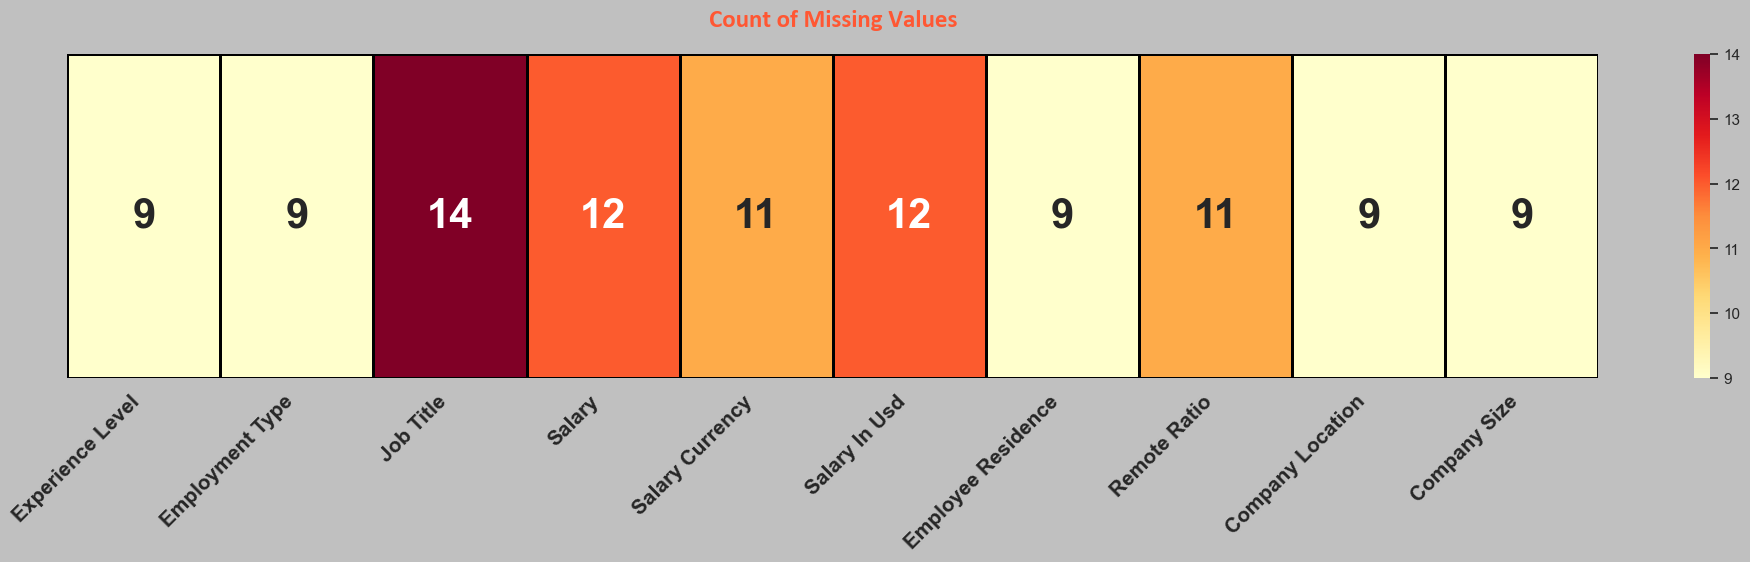

In [32]:
# Call the function to plot the heatmap
plot_missing_values_heatmap(df)

Step 5 | Duplicate Value Manage

In [12]:
# Verificar la cantidad de filas duplicadas en el DataFrame
valores_duplicados = df.duplicated().sum()
print(f"\033[94mEl conjunto de datos contiene \033[1m\033[91m{valores_duplicados}\033[0m \033[94mvalores duplicados.\033[0m")

# Eliminar filas duplicadas
df_sin_duplicados = df.drop_duplicates()

El conjunto de datos contiene 39134 valores duplicados.


In [13]:
def apply_duplicated_styling(df):
    
    # Definir una función para aplicar tamaño de fuente y color a los valores
    def apply_style(value):
        if value:
            return 'font-size: 20px; color: red'
        else:
            return 'font-size: 20px; color: green'

    # Definir una función para aplicar tamaño de fuente a los nombres de columna
    def apply_column_name_style(value):
        return 'font-size: 20px'

    # Transponer el DataFrame y verificar valores duplicados en las filas (que originalmente eran columnas)
    column_duplicates = df.T.duplicated()

    # Aplicar estilo al DataFrame que contiene la iformación de columnas duplicadas
    styled_column_duplicates = column_duplicates.to_frame().style.applymap(apply_style).background_gradient(axis=0)

    # Aplicar estilo a los nombres de columna
    styled_column_duplicates.set_table_styles([{'selector': 'th', 'props': [('font-size', '20px')]}])

    return styled_column_duplicates

In [ ]:
styled_df = apply_duplicated_styling(df)
styled_df


Step 6 | Statistical Data Summary

In [24]:
def calculate_statistics(df, opacity=0.5, font_size='17px'):
    # Filtrar solo columnas numéricas
    numeric_df = df.select_dtypes(include=['number'])
    
    stat = pd.DataFrame()

    # Medidas de tendencia central
    stat['Mean'] = numeric_df.mean()
    stat['Median'] = numeric_df.median()
    stat['Mode'] = numeric_df.mode().iloc[0]

    # Medidas de dispersión
    stat['Range'] = numeric_df.max() - numeric_df.min()
    stat['Stdev'] = numeric_df.std()
    stat['Variance'] = numeric_df.var()

    # IQR
    stat['IQR'] = [stats.iqr(numeric_df[col]) for col in numeric_df.columns]

    # Cuartiles
    stat['25%'] = numeric_df.quantile(0.25)
    stat['50%'] = numeric_df.quantile(0.50)
    stat['75%'] = numeric_df.quantile(0.75)

    # Min y Max
    stat['Min'] = numeric_df.min()
    stat['Max'] = numeric_df.max()

    # Skewness y Curtosis
    stat['Skewness'] = numeric_df.skew()
    stat['Kurtosis'] = numeric_df.kurt()

    # Transponer
    stat = stat.T

    # Formato flotante
    stat = stat.applymap('{:,.2f}'.format)

    # Estilo azulito
    styled_df = stat.style.apply(
        lambda x: [f'background: rgba(135, 206, 250, {opacity})' for _ in x], axis=1
    ).set_properties(**{'font-size': font_size})

    return styled_df


In [25]:
# Ejemplo de uso:
# DataFrame llamado 'df' y deseas establecer la opacidad a 0.4
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,"2,023.83","162,555.90","158,014.86",21.58
Median,"2,024.00","148,000.00","147,500.00",0.00
Mode,"2,024.00","160,000.00","160,000.00",0.00
Range,5.00,"30,386,000.00","785,000.00",100.00
Stdev,0.48,"192,572.92","72,504.07",41.02
Variance,0.23,"37,084,328,023.17","5,256,839,633.69","1,682.81"
IQR,nan,nan,nan,nan
25%,"2,024.00","106,957.50","106,890.00",0.00
50%,"2,024.00","148,000.00","147,500.00",0.00
75%,"2,024.00","200,000.00","199,700.00",0.00


In [33]:
def variable_summary(df, opacity=0.5, font_size='20px'):
    # Inicializa una lista vacía para almacenar los resúmenes individuales
    summaries = []

    # Itera sobre cada columna del DataFrame
    for col in df.columns:
        dtype = df[col].dtype
        count = df[col].count()
        unique = df[col].nunique()
        missing = df[col].isna().sum()

        summaries.append([col, dtype, count, unique, missing])

    # Crear el DataFrame resumen
    summary_df = pd.DataFrame(summaries, columns=['Variable', 'Dtype', 'Count', 'Unique', 'Missing'])

    # Aplicar color azul (ej. azul marino con transparencia)
    styled_summary_df = summary_df.style.apply(
        lambda x: [f'background: rgba(70, 130, 180, {opacity})' for _ in x], axis=1  # Steel Blue
    ).set_properties(**{'font-size': font_size})

    return styled_summary_df


In [34]:
summary_df = variable_summary(df)
summary_df


,Variable,Dtype,Count,Unique,Missing
0,work_year,float64,73155,6,9
1,experience_level,object,73155,5,9
2,employment_type,object,73155,4,9
3,job_title,object,73150,289,14
4,salary,float64,73152,7096,12
5,salary_currency,object,73153,25,11
6,salary_in_usd,float64,73152,7702,12
7,employee_residence,object,73155,93,9
8,remote_ratio,float64,73153,3,11
9,company_location,object,73155,86,9
